In [2]:
source("synthesis.R")

# Parameters and initial setup

In [3]:
lambda <- 5 # Rationality parameter
cost <- function(u) {
  case_when(
    u == "NPpl" ~ 0.0,
    u == "NPsg" ~ 0,
    u == "nNPpl" ~ 1.5,
    u == "nNPsg" ~ 1.5,
    u == "!1" ~ 2.5,
    u == "n!1" ~ 4
  )
}

# Prior distributions over worlds and QuDs
P_w <- function(w) {
  case_when(
    w == "w0" ~ 0.49,
    w == "w1" ~ 0.02,
    w == "w2+" ~ 0.49
  )
}

P_Q <- function(Q) {
  case_when(
    Q == "Qex" ~ 0.96,
    Q == "Qml" ~ 0.02,
    Q == "Qfine" ~ 0.02
  )
}

P_i <- function(i) {
  case_when(
    i %in% inters ~ 1 / 16
  )
}

In [4]:
library(ggplot2)
custom_theme <- list(
  geom_col(alpha = .7),
  ylim(0, 1),
  theme_bw() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.line.y = element_blank(),
      axis.title.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.ticks.x = element_blank(),
      panel.grid = element_blank()
    )
)

# S(u|w,Q)

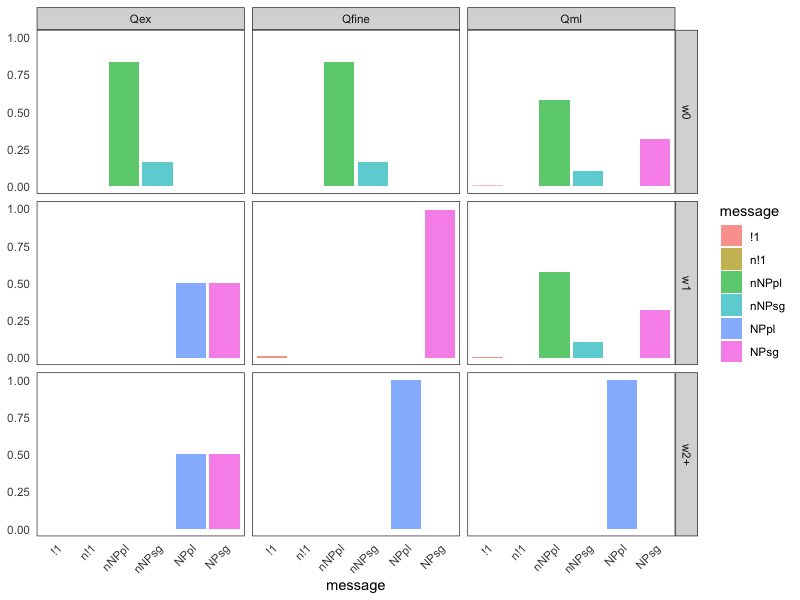

In [5]:
Sn(1) %>%
  ggplot(aes(x = message, y = prob, fill = message)) +
  facet_grid(world ~ QuD) +
  custom_theme


# L(w,Q|u)

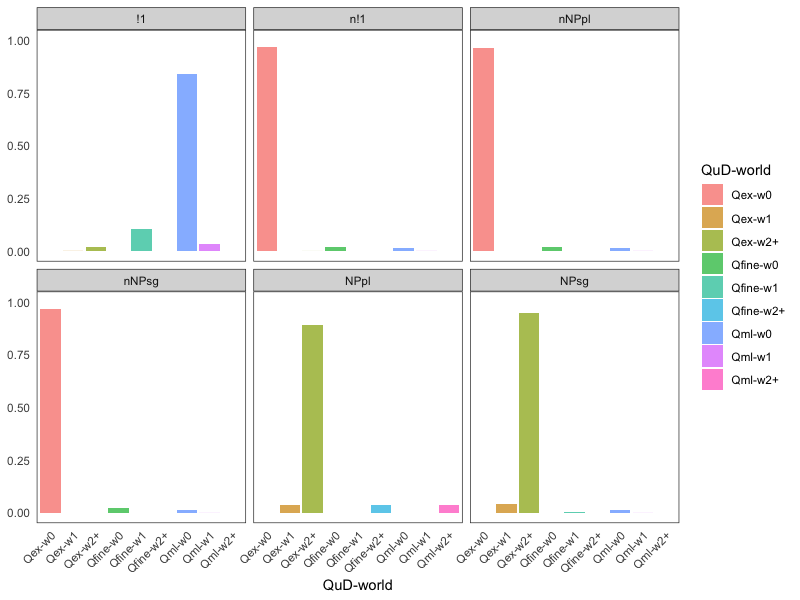

In [6]:
Ln(1) %>%
  mutate(`QuD-world` = paste(QuD, world, sep = "-")) %>%
  ggplot(aes(x = `QuD-world`, y = prob, fill = `QuD-world`)) +
  facet_wrap(~ message) +
  custom_theme

# L(Q|u)

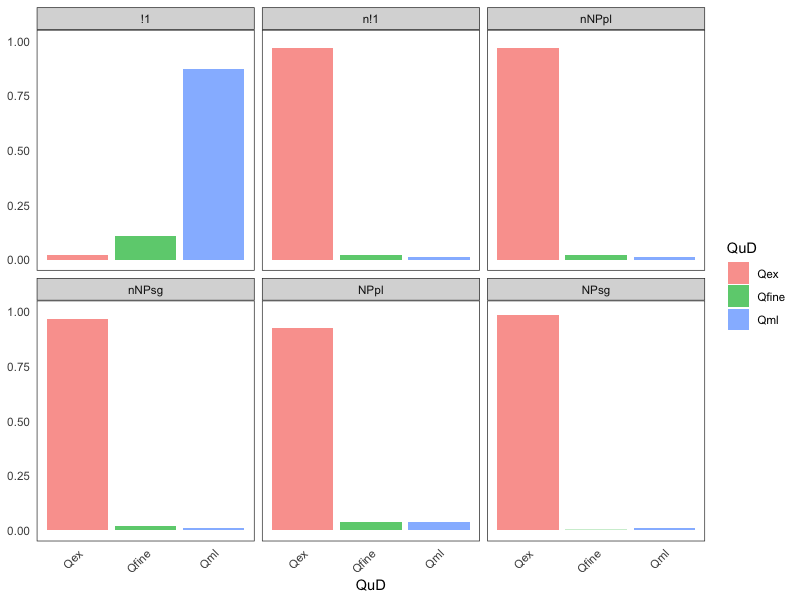

In [11]:
Ln(1) %>%
  group_by(message, QuD) %>%
  summarise(AggQuD = sum(prob)) %>%
  group_by(message) %>%
  mutate(AggQuD = AggQuD / sum(AggQuD)) %>%
  ggplot(aes(x = QuD, y = AggQuD, fill = QuD)) +
  facet_wrap(~message) +
  custom_theme

# L(w|u)

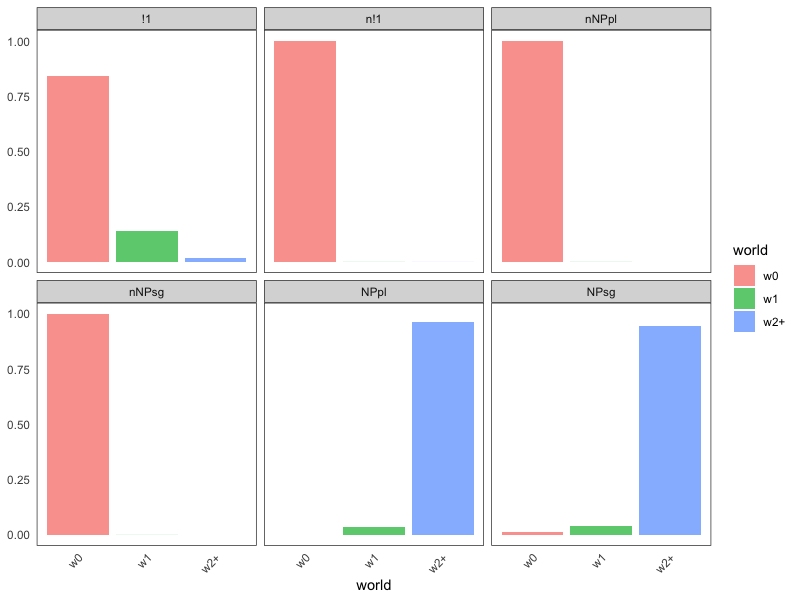

In [8]:
Ln(1) %>%
  group_by(message, world) %>%
  summarise(Aggworld = sum(prob)) %>%
  group_by(message) %>%
  mutate(Aggworld = Aggworld / sum(Aggworld)) %>%
  ggplot(aes(x = world, y = Aggworld, fill = world)) +
  facet_wrap(~message) +
  custom_theme

# S(u|w)

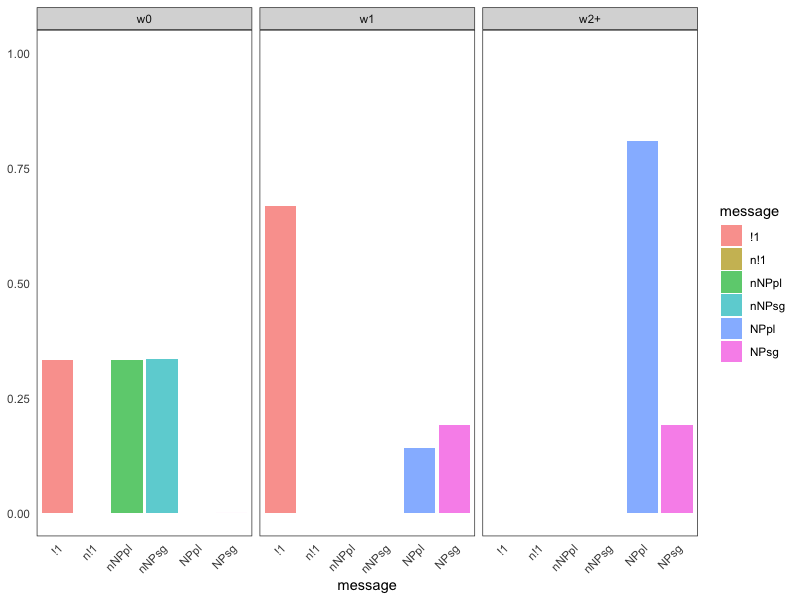

In [10]:
Sn(2) %>%
  group_by(message, world) %>%
  summarise(Aggworld = sum(prob)) %>%
  group_by(world) %>%
  mutate(Aggworld = Aggworld / sum(Aggworld)) %>%
  ggplot(aes(x = message, y = Aggworld, fill = message)) +
  facet_grid(~world) +
  custom_theme